In [1]:
# Regresja wielomianowa na realnym zbiorze danych (diabetes) dla jednowymiarowego X

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy.polynomial.polynomial as poly

In [3]:
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_csv(url, sep='\t')
df[1:10]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [4]:
print(df.shape)

(442, 11)


In [5]:
# Jednowymiarowe X

In [6]:
# Tylko jedna cecha - BMI
x = df.iloc[:,2]
y = df.iloc[:,10]

In [7]:
x_train = x[:20]
x_test = x[-20:]
y_train = y[:20]
y_test = y[-20:]

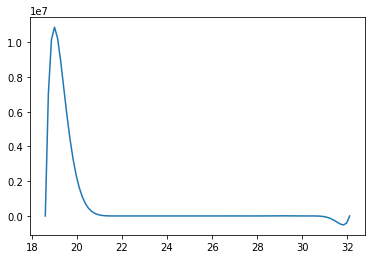

In [18]:
p = poly.Polynomial.fit(x_train, y_train, 15)
plt.plot(*p.linspace())

In [19]:
y_pred_from_train_dataset = p(x_train)
y_pred_from_test_dataset = p(x_test)

In [20]:
print('Coefficients: \n', p)
print('MAE for train dataset: %.2f' % mean_absolute_error(y_train, y_pred_from_train_dataset))
print('MSE for train dataset: %.2f' % mean_squared_error(y_train, y_pred_from_train_dataset))
print('RMSE for train dataset: %.2f' % math.sqrt(mean_squared_error(y_train, y_pred_from_train_dataset)))
print('MAE for test dataset: %.2f' % mean_absolute_error(y_test, y_pred_from_test_dataset))
print('MSE for test dataset: %.2f' % mean_squared_error(y_test, y_pred_from_test_dataset))
print('RMSE for test dataset: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred_from_test_dataset)))

Coefficients: 
 149.25286214969591 - 2437.7239262376766·x¹ - 12629.487665854207·x² +
216801.3681716691·x³ + 928196.9512995693·x⁴ - 4571944.512757766·x⁵ -
16822188.20626429·x⁶ + 41770933.97292716·x⁷ + 124852236.13872702·x⁸ -
200951781.1157717·x⁹ - 426591952.53393894·x¹⁰ + 546403989.2066232·x¹¹ +
652980371.960019·x¹² - 763042233.7152174·x¹³ - 335334068.3250403·x¹⁴ +
380176687.2699499·x¹⁵
MAE for train dataset: 13.76
MSE for train dataset: 566.16
RMSE for train dataset: 23.79
MAE for test dataset: 215980757.43
MSE for test dataset: 793927340078891008.00
RMSE for test dataset: 891026004.15


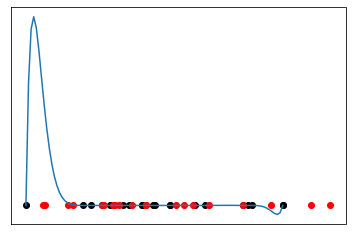

In [21]:
plt.scatter(x_train, y_train, color='black')
plt.scatter(x_test, y_test, color='red')
plt.plot(*p.linspace())
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
# Czy regresje wielomianową można "przetrenować"?